In [1]:
import pandas as pd
import numpy as np
import sklearn

df=pd.read_csv('R:\ML Jan\cardekho_data.csv')
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [2]:
#Now we need to decide which will be our target column.
#Our problem statement is that the machine will predict the price of a car, for a certain price.
#A car might have different prices for different,km driven, purchasing year,etc. So selling price shall be our Target Clm.
#All others will be input columns.
#What are the data preprocessing techniques that we can think of to do now?

import datetime

year1=datetime.date.today()   #date time and second currently
year1


datetime.date(2024, 2, 26)

In [3]:
year=datetime.date.today().year   #extracting only the year
year

2024

In [4]:
df['Year']=year-df['Year']
df

#Others like fuel type, seller type, etc are categorical type, String type data, convert that into numerical type.

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,10,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,11,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,7,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,13,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,10,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,8,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,9,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,15,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,7,11.50,12.50,9000,Diesel,Dealer,Manual,0


upper_limit: 12.375
lower_limit: -5.475
Outliers above Upperlimit Before: 19
Outliers above Lowerlimit Before: 0
Selling_Price
q25: 0.9
q75: 6.0
Outliers above Upperlimit Before: 0
Outliers above Lowerlimit Before: 0



upper_limit: 20.775000000000002
lower_limit: -9.675000000000002
Outliers above Upperlimit Before: 17
Outliers above Lowerlimit Before: 0
Present_Price
q25: 1.2
q75: 9.9
Outliers above Upperlimit Before: 0
Outliers above Lowerlimit Before: 0



upper_limit: 90975.75
lower_limit: -27208.75
Outliers above Upperlimit Before: 9
Outliers above Lowerlimit Before: 0
Kms_Driven
q25: 15000.0
q75: 48767.0
Outliers above Upperlimit Before: 0
Outliers above Lowerlimit Before: 0





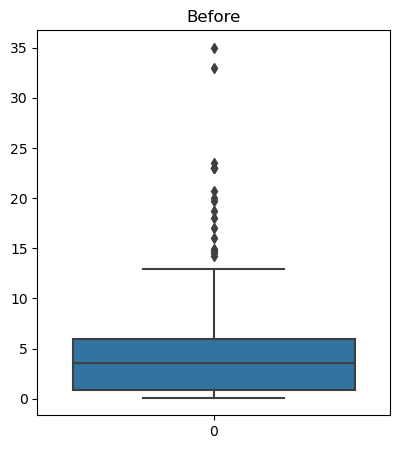

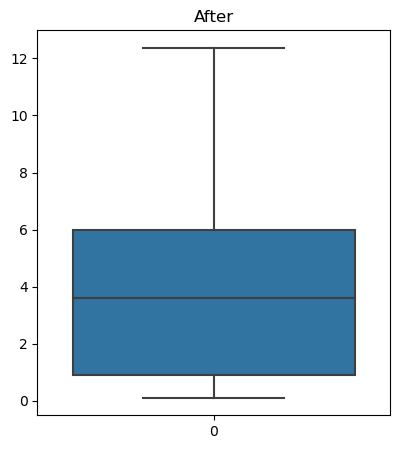

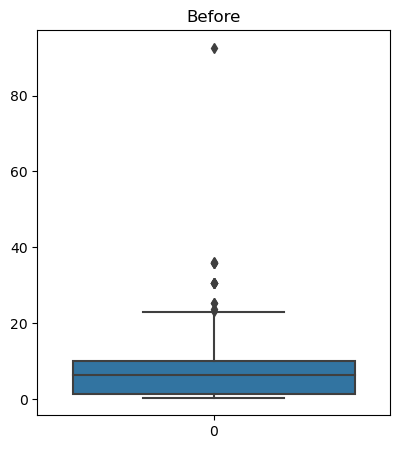

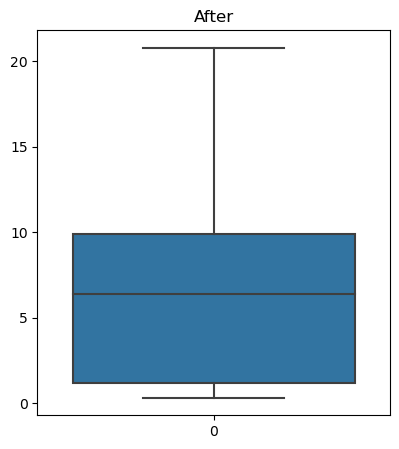

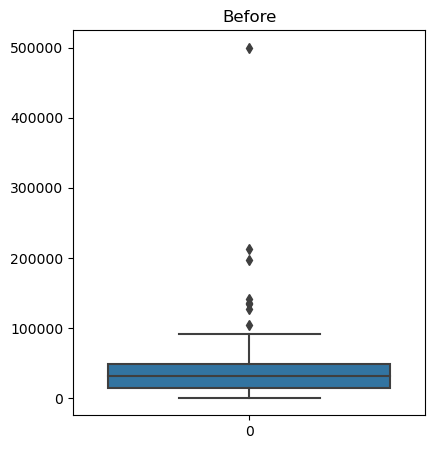

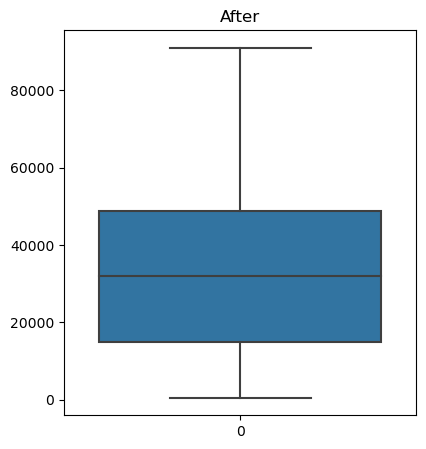

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

def outlier_remover(df,col):
    
    #Box plot before capping
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title('Before')
    sns.boxplot(data=df[col])
    
    Q1=df[col].quantile(0.25)  #25 percentile
    Q3=df[col].quantile(0.75)  #75 percentile
    
    IQR=Q3-Q1  #middle 50% of data, where majority is present. INTER QUARTILE RANGE
    
    lower_limit = Q1 - 1.25*IQR  #lower outliers below IQR
    upper_limit = Q3 + 1.25*IQR  #Higherr outliers above IQR
    
    print(f'upper_limit: {upper_limit}\nlower_limit: {lower_limit}')
    print(f'Outliers above Upperlimit Before: {df[df[col]>upper_limit].shape[0]}')
    print(f'Outliers above Lowerlimit Before: {df[df[col]<lower_limit].shape[0]}')
    
    df[col]=np.clip(df[col], lower_limit, upper_limit)  #clipping means removing data above upr lmt & below lwr lmt.
    
    #Box plot after capping
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.title('After')
    sns.boxplot(data=df[col])
    
    print(col)  #we'll be getting the refined data after clipping
    print(f'q25: {Q1}\nq75: {Q3}')
    
    print(f'Outliers above Upperlimit Before: {df[df[col]>upper_limit].shape[0]}')
    print(f'Outliers above Lowerlimit Before: {df[df[col]<lower_limit].shape[0]}\n\n\n')

    
#Let's say we're doing only for these three columns    
columns=["Selling_Price","Present_Price","Kms_Driven"]

for i in columns:
    outlier_remover(df,i)

In [6]:
#So for 1st column, we've 19 outliers above upr lmt-12.375;
#For 2nd column, we've 17 outliers abv upr lmt-20.775; and so on and so forth.
#After each outlier clipping, we see that outliers are 0 & 0.
#Moving on to the box plot, we see that the grey diamond dots represent no. of outliers present. in [Before] picture.
#In the[After]picture we see that the figures dont have any grey diamond dots.Suggesting, all outliers have been clipped.
#Next step we can do is the train-test-split.
#Also we can see a lot of categorical data[String], which we need to change to numerical type.

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()  #encodes your target labels from a value b/w 0 & no. of classes
#Now car name has a unique value. let's see what are the unique values.
df['Car_Name'].unique().sum()


'ritzsx4ciazwagon rswiftvitara brezzas crossalto 800ertigadzirealto k10ignis800balenoomnifortunerinnovacorolla altisetios crossetios getios livacorollaetios gdcamryland cruiserRoyal Enfield Thunder 500UM Renegade MojaveKTM RC200Bajaj Dominar 400Royal Enfield Classic 350KTM RC390Hyosung GT250RRoyal Enfield Thunder 350KTM 390 Duke Mahindra Mojo XT300Bajaj Pulsar RS200Royal Enfield Bullet 350Royal Enfield Classic 500Bajaj Avenger 220Bajaj Avenger 150Honda CB Hornet 160RYamaha FZ S V 2.0Yamaha FZ 16TVS Apache RTR 160Bajaj Pulsar 150Honda CBR 150Hero ExtremeBajaj Avenger 220 dtsiBajaj Avenger 150 streetYamaha FZ  v 2.0Bajaj Pulsar  NS 200Bajaj Pulsar 220 FTVS Apache RTR 180Hero Passion X proBajaj Pulsar NS 200Yamaha Fazer Honda Activa 4GTVS Sport Honda Dream Yuga Bajaj Avenger Street 220Hero Splender iSmartActiva 3gHero Passion ProHonda CB TriggerYamaha FZ S Bajaj Pulsar 135 LSActiva 4gHonda CB UnicornHero Honda CBZ extremeHonda KarizmaHonda Activa 125TVS JupyterHero Honda Passion ProHero S

In [7]:
df['Car_Name'].sum()

'ritzsx4ciazwagon rswiftvitara brezzaciazs crossciazciazalto 800ciazciazertigadzireertigaertigaertigawagon rsx4alto k10ignissx4alto k10wagon rswiftswiftswiftalto k10ciazritzritzswiftertigadziresx4dzire800alto k10sx4balenoalto k10sx4dzireomniciazritzwagon rertigaciazfortunerfortunerinnovafortunerinnovacorolla altisetios crosscorolla altisetios gfortunercorolla altisetios crossfortunerfortunerfortuneretios livainnovafortunercorolla altiscorolla altisetios livacorolla altiscorolla altisetios livaetios crossetios gcorolla altiscorollacorolla altisfortunercorolla altisetios gdinnovainnovainnovacamryland cruisercorolla altisetios livaetios gcorolla altisinnovainnovafortunercorolla altiscorolla altisinnovacorolla altiscorolla altisfortunerRoyal Enfield Thunder 500UM Renegade MojaveKTM RC200Bajaj Dominar 400Royal Enfield Classic 350KTM RC390Hyosung GT250RRoyal Enfield Thunder 350Royal Enfield Thunder 350Royal Enfield Classic 350KTM RC200Royal Enfield Thunder 350KTM 390 Duke Mahindra Mojo XT300

In [8]:
#Now we have to converet this categorical data into numerocal type. We'll keep the column name same.
df['Car_Name']=le.fit_transform(df['Car_Name'])
df['Car_Name'].unique()

array([90, 93, 68, 96, 92, 95, 91, 62, 76, 73, 63, 85,  0, 65, 89, 81, 86,
       71, 77, 78, 80, 70, 79, 67, 88, 49, 56, 42, 11, 46, 43, 40, 48, 41,
       44, 17, 45, 47,  6,  4, 32, 60, 58, 51, 14, 37, 20,  7,  5, 57, 12,
       15, 52, 26, 16, 61, 31, 54, 38,  8, 28,  1, 25, 34, 59, 13,  2, 35,
       22, 39, 30, 53, 23, 27, 33,  9, 50, 55, 36, 21, 29, 10, 24, 19, 18,
        3, 84, 82, 83, 75, 97, 74, 72, 94, 69, 66, 64, 87])

In [9]:
df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,10,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,93,11,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,68,7,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,96,13,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,92,10,4.60,6.87,42450.0,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,69,8,9.50,11.60,33988.0,Diesel,Dealer,Manual,0
297,66,9,4.00,5.90,60000.0,Petrol,Dealer,Manual,0
298,69,15,3.35,11.00,87934.0,Petrol,Dealer,Manual,0
299,69,7,11.50,12.50,9000.0,Diesel,Dealer,Manual,0


In [10]:
#For eg. see city car is 69. we can see at serial no. 296,298,299
#There are other ways to do this as well.
#We've to do this to all categorical data. Seller type, Fuel type, Transmission
df['Fuel_Type']=le.fit_transform(df['Fuel_Type'])
df['Seller_Type']=le.fit_transform(df['Seller_Type'])
df['Transmission']=le.fit_transform(df['Transmission'])
df   #let's check our df again.


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,10,3.35,5.59,27000.0,2,0,1,0
1,93,11,4.75,9.54,43000.0,1,0,1,0
2,68,7,7.25,9.85,6900.0,2,0,1,0
3,96,13,2.85,4.15,5200.0,2,0,1,0
4,92,10,4.60,6.87,42450.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...
296,69,8,9.50,11.60,33988.0,1,0,1,0
297,66,9,4.00,5.90,60000.0,2,0,1,0
298,69,15,3.35,11.00,87934.0,2,0,1,0
299,69,7,11.50,12.50,9000.0,1,0,1,0


In [11]:
#As we can see we don't have any categorical data now.
#Now we can split our data into Xand Y. As we said earlier, Selling_Price will be our target.

X=df.drop(['Selling_Price'], axis=1)  #dropping out Sellling price from X.
X

,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,90,10,5.59,27000.0,2,0,1,0
1,93,11,9.54,43000.0,1,0,1,0
2,68,7,9.85,6900.0,2,0,1,0
3,96,13,4.15,5200.0,2,0,1,0
4,92,10,6.87,42450.0,1,0,1,0
...,...,...,...,...,...,...,...,...
296,69,8,11.60,33988.0,1,0,1,0
297,66,9,5.90,60000.0,2,0,1,0
298,69,15,11.00,87934.0,2,0,1,0
299,69,7,12.50,9000.0,1,0,1,0


In [12]:
Y=df.Selling_Price  #Considering Y as our Selling_Price
Y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [13]:
#train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2,random_state=42)
X_train


,Car_Name,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
184,14,16,0.750,26000.0,2,1,1,1
132,6,7,0.950,3500.0,2,1,1,0
194,18,16,0.787,50000.0,2,1,1,0
75,78,9,6.800,36000.0,2,0,1,0
111,48,8,1.500,8700.0,2,1,1,0
...,...,...,...,...,...,...,...,...
188,21,11,0.570,18000.0,2,1,1,0
71,71,13,12.480,45000.0,1,0,1,0
106,40,10,3.450,16500.0,2,1,1,1
270,69,13,10.000,69341.0,2,0,1,0


In [14]:
Y_test

177     0.35
289    10.11
228     4.95
198     0.15
60      6.95
       ...  
234     5.50
296     9.50
281     2.10
285     7.40
182     0.30
Name: Selling_Price, Length: 61, dtype: float64

In [15]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-1.86352444,  1.96986094, -1.03807089, ...,  1.33816952,
         0.37796447,  3.52821143],
       [-2.17378866, -1.15644297, -1.00356373, ...,  1.33816952,
         0.37796447, -0.18569534],
       [-1.70839234,  1.96986094, -1.03168706, ...,  1.33816952,
         0.37796447, -0.18569534],
       ...,
       [-0.85516574, -0.11434167, -0.57222427, ...,  1.33816952,
         0.37796447,  3.52821143],
       [ 0.26954204,  0.92775963,  0.55788511, ..., -0.74728947,
         0.37796447, -0.18569534],
       [-0.77759969, -1.15644297, -0.86035903, ...,  1.33816952,
         0.37796447, -0.18569534]])

In [16]:
display(X_train.mean())
display(X_train.max())
display(X_train.min())
display(X_train.std())

-6.510995446499616e-17

10.956024952446061

-4.242857676576995

1.0

In [17]:
X_test=sc.transform(X_test)
X_test

array([[-1.24299601, -0.80907587, -1.06912733, -0.43548958,  0.48236665,
         1.33816952, -2.64575131, -0.18569534],
       [ 0.26954204, -0.80907587,  1.17901393, -0.98895014,  0.48236665,
        -0.74728947,  0.37796447, -0.18569534],
       [ 1.23911771,  0.58039253,  0.45436364,  1.09481612, -1.88024551,
        -0.74728947,  0.37796447, -0.18569534],
       [-2.01865655,  0.92775963, -1.06912733,  0.03210383,  0.48236665,
         1.33816952,  0.37796447,  3.52821143],
       [ 0.34710809,  0.23302543,  2.04341821,  0.2446888 ,  0.48236665,
        -0.74728947,  0.37796447, -0.18569534],
       [ 0.23075901, -0.46170877,  0.37154646,  0.34526389, -1.88024551,
        -0.74728947,  0.37796447, -0.18569534],
       [-0.62246758, -0.46170877, -0.91384512, -0.35047259,  0.48236665,
         1.33816952,  0.37796447, -0.18569534],
       [-0.04072218, -0.11434167, -1.01564124, -1.11562544,  0.48236665,
         1.33816952,  0.37796447, -0.18569534],
       [-1.32056207, -0.80907587

In [22]:
#Now we can do Neural Network model with TensorFlow library

import tensorflow as tf
from tensorflow.keras.models import Sequential #Sequential is an empty space where we can build NeuralNtwrk model
from tensorflow.keras.layers import Dense      # Dense is basically my ANN
from tensorflow.keras.optimizers import Adam   #optimizers algorithms or methods used to change the attributes of our 
#neural network such as weights and learning rate in order to reduce the losses. Optimizers help to get results faster.

model = Sequential()
model.add(Dense(32, activation ='relu', input_dim=X_train.shape[1])) #as input, we put [1]=no.of columns of X_train 
model.add(Dense(32, activation ='relu'))
model.add(Dense(1, activation ='linear'))#O/P layer.In regression, no need to give activation fn.if ever needed,use linear

optimizer=Adam(learning_rate=0.01)
#Compile the model with appropriate loss function and optimizer
model.compile(loss='mean_absolute_error', optimizer=optimizer, metrics=['accuracy'])

#Train the model
model.fit(X_train, Y_train, epochs=1000, batch_size=16)



Epoch 1/1000
15/15 [==============================] - 2s 4ms/step - loss: 2.6917 - accuracy: 0.0042
Epoch 2/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.9584 - accuracy: 0.0000e+00
Epoch 3/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.7259 - accuracy: 0.0000e+00
Epoch 4/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6576 - accuracy: 0.0000e+00
Epoch 5/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.6071 - accuracy: 0.0000e+00
Epoch 6/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.6744 - accuracy: 0.0000e+00
Epoch 7/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.6319 - accuracy: 0.0000e+00
Epoch 8/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.6295 - accuracy: 0.0000e+00
Epoch 9/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.5398 - accuracy: 0.0000e+00
Epoch 10/1000
15/15 [==============================] - 0s 3ms/step -

15/15 [==============================] - 0s 2ms/step - loss: 0.3022 - accuracy: 0.0042
Epoch 160/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2673 - accuracy: 0.0042
Epoch 161/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2785 - accuracy: 0.0042
Epoch 162/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.2811 - accuracy: 0.0042
Epoch 163/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2929 - accuracy: 0.0042
Epoch 164/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.3401 - accuracy: 0.0042
Epoch 165/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.3401 - accuracy: 0.0042
Epoch 166/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2650 - accuracy: 0.0042
Epoch 167/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.0042
Epoch 168/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2627 - accuracy: 0.

15/15 [==============================] - 0s 2ms/step - loss: 0.2850 - accuracy: 0.0042
Epoch 320/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2567 - accuracy: 0.0042
Epoch 321/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2067 - accuracy: 0.0042
Epoch 322/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2057 - accuracy: 0.0042
Epoch 323/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.2138 - accuracy: 0.0042
Epoch 324/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2242 - accuracy: 0.0042
Epoch 325/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2243 - accuracy: 0.0042
Epoch 326/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2022 - accuracy: 0.0042
Epoch 327/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.2165 - accuracy: 0.0042
Epoch 328/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.1849 - accuracy: 0.

15/15 [==============================] - 0s 2ms/step - loss: 0.1807 - accuracy: 0.0042
Epoch 480/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1846 - accuracy: 0.0042
Epoch 481/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1820 - accuracy: 0.0042
Epoch 482/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.1983 - accuracy: 0.0042
Epoch 483/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.1650 - accuracy: 0.0042
Epoch 484/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1619 - accuracy: 0.0042
Epoch 485/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1585 - accuracy: 0.0042
Epoch 486/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1775 - accuracy: 0.0042
Epoch 487/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1709 - accuracy: 0.0042
Epoch 488/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1782 - accuracy: 0.

15/15 [==============================] - 0s 2ms/step - loss: 0.1419 - accuracy: 0.0042
Epoch 640/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1625 - accuracy: 0.0042
Epoch 641/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1554 - accuracy: 0.0042
Epoch 642/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1611 - accuracy: 0.0042
Epoch 643/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.2160 - accuracy: 0.0042
Epoch 644/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.2063 - accuracy: 0.0042
Epoch 645/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1885 - accuracy: 0.0042
Epoch 646/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1423 - accuracy: 0.0042
Epoch 647/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1444 - accuracy: 0.0042
Epoch 648/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.1459 - accuracy: 0.

15/15 [==============================] - 0s 2ms/step - loss: 0.1346 - accuracy: 0.0042
Epoch 800/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1355 - accuracy: 0.0042
Epoch 801/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1208 - accuracy: 0.0042
Epoch 802/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1472 - accuracy: 0.0042
Epoch 803/1000
15/15 [==============================] - 0s 3ms/step - loss: 0.1460 - accuracy: 0.0042
Epoch 804/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1526 - accuracy: 0.0042
Epoch 805/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1260 - accuracy: 0.0042
Epoch 806/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1431 - accuracy: 0.0042
Epoch 807/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1433 - accuracy: 0.0042
Epoch 808/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1442 - accuracy: 0.

15/15 [==============================] - 0s 2ms/step - loss: 0.1611 - accuracy: 0.0042
Epoch 960/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.1351 - accuracy: 0.0042
Epoch 961/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1248 - accuracy: 0.0042
Epoch 962/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1273 - accuracy: 0.0042
Epoch 963/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1466 - accuracy: 0.0042
Epoch 964/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1557 - accuracy: 0.0042
Epoch 965/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1225 - accuracy: 0.0042
Epoch 966/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.1055 - accuracy: 0.0042
Epoch 967/1000
15/15 [==============================] - 0s 2ms/step - loss: 0.1283 - accuracy: 0.0042
Epoch 968/1000
15/15 [==============================] - 0s 1ms/step - loss: 0.1345 - accuracy: 0.